In [5]:
import os
import numpy as np
import pandas as pd

In [6]:
runs_path = 'history/runs/'

# get the latest of each unique models with ep in folder name
latest_runs = {}

for model_folder in os.listdir(runs_path):
    if 'ep' in model_folder:
        model_name = model_folder.split('_ep')[0]
        if model_name not in latest_runs or model_folder > latest_runs[model_name]:
            latest_runs[model_name] = model_folder

# print the latest runs
for model_name, run_folder in latest_runs.items():
    print(f"Latest run for {model_name}: {run_folder}")

# Now, let's read the metrics.csv file from each of these latest runs and print the row that has the highest val_auc

for model_name, run_folder in latest_runs.items():
    metrics_path = os.path.join(runs_path, run_folder, 'metrics.csv')
    
    # Check if the file exists before trying to read it
    if os.path.exists(metrics_path):
        metrics_data = pd.read_csv(metrics_path)
        best_val_auc_row = metrics_data.loc[metrics_data['val_auc'].idxmax()]
        
        # printing
        print(f'-' * 50)
        print(f"Best val_auc for {model_name} - Run: {run_folder}")
        print(best_val_auc_row)
        
    else:
        print(f"No metrics.csv found for {model_name} - Run: {run_folder}")

Latest run for run_efficientnet_20241205_114438: run_efficientnet_20241205_114438_ep7
Latest run for run_resnet101_20241204_201138: run_resnet101_20241204_201138_ep14
Latest run for run_resnet50_20241208_231720: run_resnet50_20241208_231720_ep6
Latest run for run_vit_base_20241207_110738: run_vit_base_20241207_110738_ep2
Latest run for run_vit_base_20241207_113554: run_vit_base_20241207_113554_ep28
Latest run for run_vit_mediumd_20241209_002034: run_vit_mediumd_20241209_002034_ep26
Latest run for run_vit_mediumd_20241209_021310: run_vit_mediumd_20241209_021310_ep13
Latest run for run_vit_mediumd_20241209_030414: run_vit_mediumd_20241209_030414_ep7
Latest run for run_vit_mediumd_20241209_032928: run_vit_mediumd_20241209_032928_ep7
--------------------------------------------------
Best val_auc for run_efficientnet_20241205_114438 - Run: run_efficientnet_20241205_114438_ep7
epoch           7.000000
loss            1.204147
accuracy        0.823851
auc             0.713347
val_loss       

In [10]:
paths = [
    'history/runs/run_vit_base_20241207_113554_ep28/',
    'history/runs/run_efficientnet_20241205_114438_ep7/',
    'history/runs/run_resnet50_20241208_231720_ep6/',
    'history/runs/run_resnet101_20241204_201138_ep14/',
    'history/runs/run_vit_mediumd_20241209_002034_ep26/',
]
from util import plot_metrics

for path in paths:
    metrics_path = os.path.join(path, 'metrics.csv')
    metrics_data = pd.read_csv(metrics_path)
    # print a seperator
    print(f"{'-'*50}")
    print(f"Model: {path.split('/')[-2]}")
    # instead of using tail, get the highest val_auc across all epoches
    best_val_auc_row = metrics_data.loc[metrics_data['val_auc'].idxmax()]
    print(best_val_auc_row)
    
    plot_metrics(metrics_data, model_name=path.split('/')[-2])


In [11]:
# save plotted image in results dir
# Create a directory to save the plots if it doesn't exist
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

import matplotlib.pyplot as plt

# Define a mapping from folder names to proper model names
model_name_mapping = {
    'run_vit_base_20241207_113554_ep28': 'Vision Transformer Base',
    'run_efficientnet_20241205_114438_ep7': 'EfficientNet',
    'run_resnet50_20241208_231720_ep6': 'ResNet-50',
    'run_resnet101_20241204_201138_ep14': 'ResNet-101',
    'run_vit_mediumd_20241209_002034_ep26': 'Vision Transformer Medium'
}

# Save each plot as an image in the results directory
for path in paths:
    metrics_path = os.path.join(path, 'metrics.csv')
    metrics_data = pd.read_csv(metrics_path)
    folder_name = path.split('/')[-2]
    model_name = model_name_mapping.get(folder_name, folder_name)
    
    # Plot and save the metrics
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_data['epoch'], metrics_data['loss'], label='Training Loss', marker='o')
    plt.plot(metrics_data['epoch'], metrics_data['val_loss'], label='Validation Loss', marker='o')
    plt.title(model_name + ': Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(results_dir, f"{folder_name}_loss.png"))
    plt.close()

    plt.figure(figsize=(10, 6))
    plt.plot(metrics_data['epoch'], metrics_data['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(metrics_data['epoch'], metrics_data['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title(model_name + ': Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(results_dir, f"{folder_name}_accuracy.png"))
    plt.close()

    plt.figure(figsize=(10, 6))
    plt.plot(metrics_data['epoch'], metrics_data['auc'], label='Training AUC', marker='o')
    plt.plot(metrics_data['epoch'], metrics_data['val_auc'], label='Validation AUC', marker='o')
    plt.title(model_name + ': Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(results_dir, f"{folder_name}_auc.png"))
    plt.close()


In [86]:
best_metrics = {
    'Model': [],
    'Best val_accuracy': [],
    'Best val_auc': [],
    'Best val_loss': [],
    'Epoch': []
}

# use these
paths = [
    'history/runs/run_resnet50_20241208_231720_ep6/',
    'history/runs/run_resnet101_20241204_201138_ep14/',
    'history/runs/run_efficientnet_20241205_114438_ep7/',
    'history/runs/run_vit_base_20241207_113554_ep28/',
    'history/runs/run_vit_mediumd_20241209_002034_ep26/',
]

for path in paths:
    metrics_path = os.path.join(path, 'metrics.csv')
    metrics_data = pd.read_csv(metrics_path)
    best_val_accuracy_row = metrics_data.loc[metrics_data['val_auc'].idxmax()]


    best_metrics['Model'].append(path.split('/')[-2].split('_')[1])
    # for specifically epoches get total train epoch counts, so the last row
    best_metrics['Epoch'].append(metrics_data['epoch'].iloc[-1])
    best_metrics['Best val_accuracy'].append(best_val_accuracy_row['val_accuracy'])
    best_metrics['Best val_auc'].append(best_val_accuracy_row['val_auc'])
    best_metrics['Best val_loss'].append(best_val_accuracy_row['val_loss'])
    

best_metrics_df = pd.DataFrame(best_metrics)
best_metrics_df

# change "Model" [3] to "vit_base" and "Model" [3] to "vit_medium"
best_metrics_df['Model'] = best_metrics_df['Model'].iloc[:3].tolist() + ['vit_base', 'vit_mediumd']
best_metrics_df

# sort by Best val_auc in descending order
best_metrics_df = best_metrics_df.sort_values(by='Best val_auc', ascending=False)

# start index with 1
best_metrics_df.index = np.arange(1, len(best_metrics_df) + 1)
best_metrics_df

,Model,Best val_accuracy,Best val_auc,Best val_loss,Epoch
1,resnet50,0.740632,0.741148,1.191993,6
2,efficientnet,0.791354,0.661808,1.284357,7
3,vit_base,0.977244,0.617185,1.372631,28
4,resnet101,0.914092,0.584653,1.376719,14
5,vit_mediumd,0.978797,0.549083,1.358324,25


In [ ]:
# add a column for total parameters
mapped_params = {
     'resnet50': 23503809,
     'resnet101': 42495937,
     'efficientnet': 20178337,
     'vit_base': 86042113,
     'vit_mediumd': 63727617
}

best_metrics_df['Total parameters'] = best_metrics_df['Model'].map(mapped_params)
best_metrics_df

,Model,Best val_accuracy,Best val_auc,Best val_loss,Epoch,Total parameters
1,resnet50,0.740632,0.741148,1.191993,6,23503809
2,efficientnet,0.791354,0.661808,1.284357,7,20178337
3,vit_base,0.977244,0.617185,1.372631,28,86042113
4,resnet101,0.914092,0.584653,1.376719,14,42495937
5,vit_mediumd,0.978797,0.549083,1.358324,25,63727617


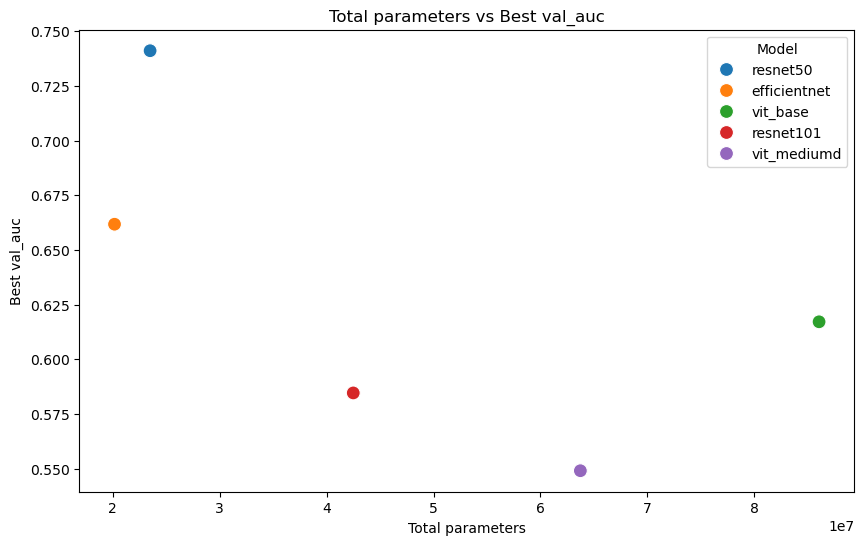

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot param against val_auc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total parameters', y='Best val_auc', data=best_metrics_df, hue='Model', s=100)
plt.title('Total parameters vs Best val_auc')
plt.xlabel('Total parameters')
plt.ylabel('Best val_auc')
plt.legend(title='Model')
plt.show()